# Analytics based on Skills - Work.UA

### Install and import libraries

In [ ]:
!pip install bs4

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import bs4
import re
from urllib.request import urlopen as uReq
#from bs4 import BeautifulSoup as soup
from bs4 import BeautifulSoup
#import urllib

### Define job title and geographic location

Search Work.ua web-site for "Data Scientist" job vacancies.

In [3]:
#jobtitle = str(input("Please enter the job title: "))
jobtitle = 'data scientist'
#location = str(input("Please enter the job location:"))
#location = 'Toronto'
query1=jobtitle.replace(' ','+')
#query2=location.replace(' ','+')
url_base = 'https://www.work.ua'
urlorig = url_base + '/jobs-'+query1+'/'
urlorig

'https://www.work.ua/jobs-data+scientist/'

In [4]:
url = uReq(urlorig)
page_html = url.read()
url.close()

In [5]:
page_soup = BeautifulSoup(page_html,'html.parser')
#print(page_soup)

In [6]:
links = []

for link in page_soup.find_all('a'):
    if link.get('title'):
        if link.get('title').startswith("Сторінка"):
            links.append(link.get('href'))
            print(link.get('href'),link.get('title'))

/jobs-data+scientist/?ss=1&page=2 Сторінка 2
/jobs-data+scientist/?ss=1&page=3 Сторінка 3
/jobs-data+scientist/?ss=1&page=44 Сторінка 44


In [7]:
links[-1]

'/jobs-data+scientist/?ss=1&page=44'

In [8]:
try:
    num_pages = re.search('page=(.*)', links[-1])
    N_pages = int(num_pages.group(1))
except:
    N_pages = 1
url_pages = links[-1][:-len(str(N_pages))]
url_pages

'/jobs-data+scientist/?ss=1&page='

### Create list of job vacancies

Extract knowledge of technologies (Python, Excel, R, Matlab, Hadoop, Spark, etc.)

In [9]:
# Empty list for job_title, company_name, location, job_description, job skills
titles = []
company_names = []
location_names = []
job_descriptions = []
job_descriptHTML = []
job_ids = []
skills = {}
skills['Python'] = []
skills['R '] = []
skills['Matlab'] = []
skills['Excel'] = []
skills['SAS'] = []
skills['SQL'] = []
skills['SPSS'] = []
skills['Hadoop'] = []
skills['Spark'] = []

#for i in range(1,3):
for i in range(1,N_pages+1):
    
    # html parsing Work.ua job portal page 
    my_url = url_base + url_pages + str(i)
    uClient = uReq(my_url)
    page_html = uClient.read()
    uClient.close()
    page_soup = BeautifulSoup(page_html,'html.parser')
    
    # extract job_title
    jobs = page_soup.findAll('div',{'class': 'job-link'})
    print(my_url,' ',len(jobs), 'jobs')
    for job in jobs:
        try:
            title = job.find(class_='add-bottom-sm').get_text()
            title = title.strip(' \t\n\r')
            titles.append(title)
        except:
            title = "N/A"
            titles.append(title)

    links = page_soup.findAll("h2", class_ = "add-bottom-sm")   

    for link in links:

        #print(url_base + link.a["href"])
        Jb = uReq(url_base + link.a["href"])
        try:
            res_id = re.search('\/jobs\/(.*)\/', link.a["href"])
            job_ids.append(res_id.group(1))
        except:
            job_ids.append("")

        Jb_html = Jb.read()
        Jb.close()
        Jb_soup = BeautifulSoup(Jb_html, "html.parser")
        
        html = u""
        for tag in Jb_soup.find("h1").next_siblings:
            if tag.name == "div":
                break
            else:
                html += str(tag)
                #html += unicode(tag)

        cleantext = BeautifulSoup(str(html), 'lxml').text
        
        job_descriptHTML.append(html)

        try:
            job_descriptions.append(cleantext)  
        except:
            job_descriptions.append("NA")  
            
        if("excel" in cleantext.lower()):
            skills['Excel'].append('1')
        else:
            skills['Excel'].append('0')
            
        if("python" in cleantext.lower()):
            skills['Python'].append('1')
        else:
            skills['Python'].append('0')
            
        if("R " in cleantext):
            skills['R '].append('1')
        else:
            skills['R '].append('0')
        
        if("matlab" in cleantext.lower()):
            skills['Matlab'].append('1')
        else:
            skills['Matlab'].append('0')
        
        if("sas" in cleantext.lower()):
            skills['SAS'].append('1')
        else:
            skills['SAS'].append('0')
            
        if("sql" in cleantext.lower()):
            skills['SQL'].append('1')
        else:
            skills['SQL'].append('0')
            
        if("spss" in cleantext.lower()):
            skills['SPSS'].append('1')
        else:
            skills['SPSS'].append('0')
            
        if("hadoop" in cleantext.lower()):
            skills['Hadoop'].append('1')
        else:
            skills['Hadoop'].append('0')
        
        if("spark" in cleantext.lower()):
            skills['Spark'].append('1')
        else:
            skills['Spark'].append('0')

https://www.work.ua/jobs-data+scientist/?ss=1&page=1   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=2   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=3   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=4   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=5   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=6   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=7   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=8   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=9   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=10   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=11   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=12   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=13   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=14   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&page=15   14 jobs
https://www.work.ua/jobs-data+scientist/?ss=1&pag

### Create dataframe with job vacancies and save it to csv file

In [10]:
d = {'Job_ID':job_ids,'Job_Title':titles,'Job_Description':job_descriptions,'Job_DescripHTML':job_descriptHTML}
df1 = pd.DataFrame(d)
df2 = pd.DataFrame(skills)
frames = [df1, df2]
results = pd.concat(frames, axis = 1)
results.head()

,Job_DescripHTML,Job_Description,Job_ID,Job_Title,Excel,Hadoop,Matlab,Python,R,SAS,SPSS,SQL,Spark
0,"\n<h3 class=""text-muted text-muted-print""><b>1...",12000 грн \n\nКомпанія:\n\nШвидкоГрошi\n VIP ...,3296699,"Кредитный аналитик, верификатор, специалист по...",0,0,0,0,0,0,0,0,0
1,"\n<h3 class=""text-muted text-muted-print""><b>1...",12000 грн \n\nКомпанія:\n\nЛопань\n ...,3338965,"Бухгалтер-аналитик, 12000 грн",0,0,0,0,0,0,0,0,0
2,"\n<dl class=""dl-horizontal"">\n<dt>Компанія:</d...",\nКомпанія:\n\nMadness Media\n ...,3360254,Digital Analyst,0,0,0,1,0,0,0,1,0
3,"\n<dl class=""dl-horizontal"">\n<dt>Компанія:</d...",\nКомпанія:\n\nМакси Маркетинг\n VIP ...,3365383,Аналитик,1,0,0,0,0,0,0,0,0
4,"\n<h3 class=""text-muted text-muted-print""><b>9...",9000 грн \n\nКомпанія:\n\nКредитКафе\n ...,1326234,"Специалист аналитического отдела, верификатор,...",0,0,0,0,0,0,0,0,0


In [11]:
results.tail()

,Job_DescripHTML,Job_Description,Job_ID,Job_Title,Excel,Hadoop,Matlab,Python,R,SAS,SPSS,SQL,Spark
606,"\n<dl class=""dl-horizontal"">\n<dt>Компанія:</d...","\nКомпанія:\n\nLevelUP, рекрутинговое агентств...",3341357,Report Analyst,1,0,0,0,0,0,0,1,0
607,"\n<dl class=""dl-horizontal"">\n<dt>Компанія:</d...",\nКомпанія:\n\nSocialMedia.Market\n\n ...,3341292,Web/Data Analyst (Middle+),1,0,0,1,0,0,0,1,0
608,"\n<dl class=""dl-horizontal"">\n<dt>Компанія:</d...",\nКомпанія:\n\nTogether Networks\n ...,3340948,Business analyst,0,0,0,0,0,0,0,0,0
609,"\n<h3 class=""text-muted text-muted-print""><b>6...",6000 грн \n\nКомпанія:\n\nFinSoft\n ...,3119144,"Младший аналитик 1С, 6000 грн",0,0,0,0,0,0,0,0,0
610,"\n<h3 class=""text-muted text-muted-print""> По ...",По результатам собеседования\n\nКомпанія:\n\n...,3225828,Аналитик 1C,0,0,0,0,0,0,0,0,0


In [12]:
results.to_csv('WorkUA_job_vacancies.csv')

### Plot percent of vacancies requiring knowledge of technology stacks

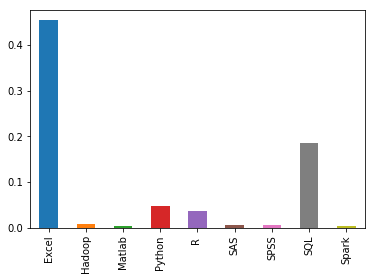

In [13]:
%matplotlib inline
df2.apply(pd.to_numeric).mean().plot(kind='bar')

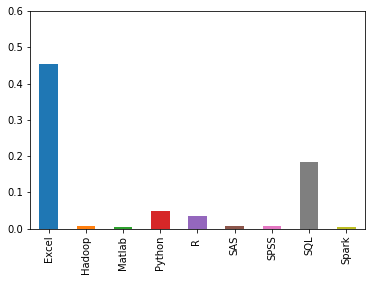

In [14]:
df2.apply(pd.to_numeric).mean().plot(kind='bar',ylim=(0.0,0.6))